In [ ]:
Answer1

In [42]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# Path to the directory containing policy CSV files
policy_dir_path = 'policy_data/policy/'

In [44]:
# Initialize an empty DataFrame to store all policy data
all_policy_data = pd.DataFrame()

In [45]:
# Iterate over each file in the policy directory
for file in os.listdir(policy_dir_path):
    if file.endswith('.csv'):
        file_path = os.path.join(policy_dir_path, file)
        state_policy_data = pd.read_csv(file_path)
        state_policy_data['State'] = file.replace('_policy.csv', '')  # Add a column for the state name
        all_policy_data = pd.concat([all_policy_data, state_policy_data], ignore_index=True)

In [46]:
# Specify date format to avoid warnings, assuming dates are in 'd-M-y' format, adjust as needed
all_policy_data['date'] = pd.to_datetime(all_policy_data['date'], format='%d-%b-%y', errors='coerce')

In [47]:
# Create a pivot table for heatmap data
policy_counts = all_policy_data.drop(columns=['date', 'policy']).apply(pd.notnull)
policy_counts['State'] = all_policy_data['State']
heatmap_data = policy_counts.groupby('State').sum().T  # Transpose to make states columns

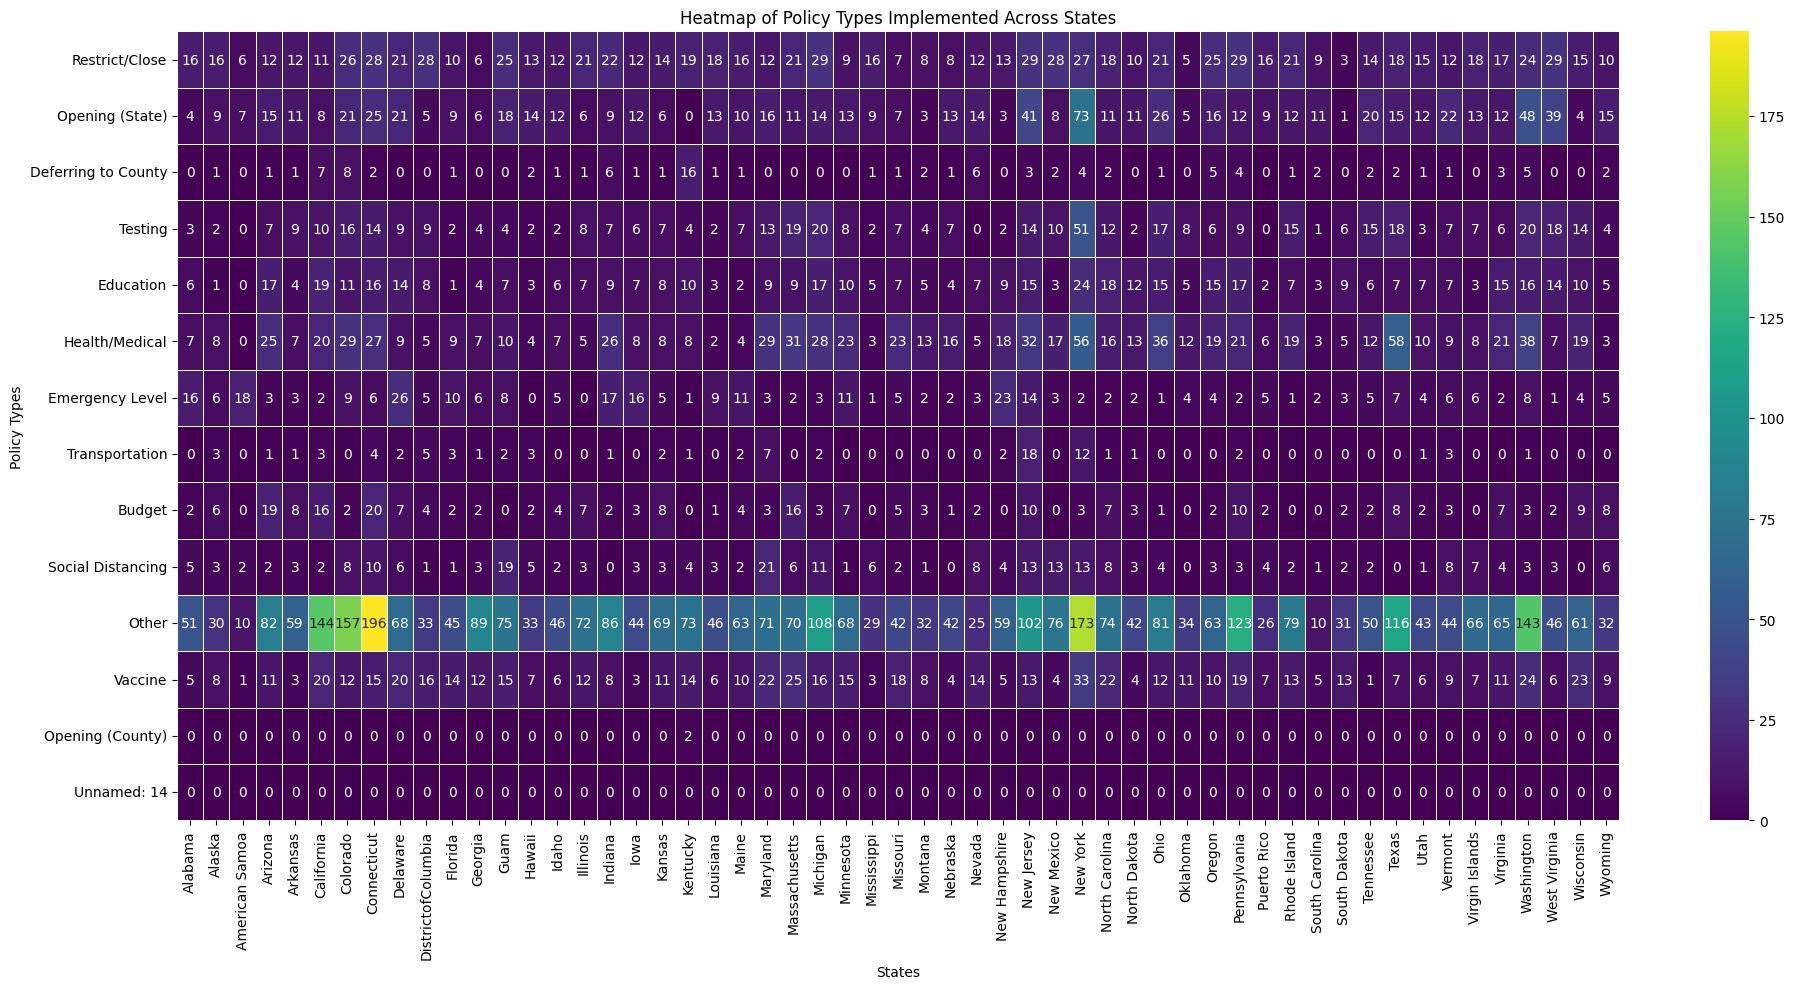

In [48]:
# Plotting the heatmap
plt.figure(figsize=(20, 10))  # Adjust size as necessary for better visibility
sns.heatmap(heatmap_data, cmap="viridis", linewidths=.5, annot=True, fmt="d")
plt.title('Heatmap of Policy Types Implemented Across States')
plt.ylabel('Policy Types')
plt.xlabel('States')
plt.xticks(rotation=90)  # Rotate state names for better visibility
plt.tight_layout()
plt.show()

In [ ]:
The heatmap provides a visual representation of the number and types of COVID-19-related policies implemented by each state in the U.S.

1. Policy Diversity and Volume: The vertical axis shows different types of policies, while the horizontal axis represents the states. 
Each cells color intensity indicates the number of times a specific type of policy was implemented in each state. Darker colors represent 
higher numbers.

2. State Comparisons: You can compare states based on the color intensity in the rows, giving you a quick visual comparison of how active 
different states were in implementing certain types of policies.

3. Policy Focus Areas: By observing which rows have darker colors across most states, one can identify which policy areas were most commonly 
addressed nationally.